In [5]:
import matplotlib.pyplot as plt
import json
import numpy as np

In [13]:
with open('results.json', 'r') as fileHandle:
    data = json.load(fileHandle)
    uniform, non_uniform = data['uni'], data['non-uni']

In [23]:
del non_uniform['reconst']
list(uniform)
list(non_uniform)

['0', '4', '8', '16', '32', '64', '128']

## Uniform VS non-uniform 

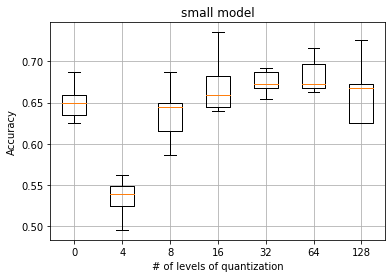

In [54]:
fig, axis = plt.subplots(1, 1)
axis.set_title('small model')
axis.boxplot([uniform[nb_levels]['small'] for nb_levels in uniform])
axis.set_xticklabels([int(nb_levels) for nb_levels in uniform])
axis.set_xlabel("# of levels of quantization")
axis.set_ylabel("Accuracy")
axis.grid()
plt.show()

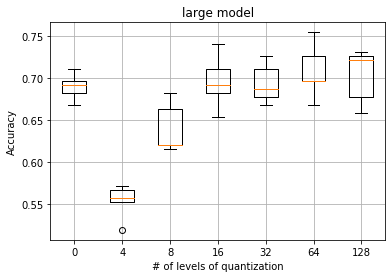

In [55]:
fig, axis = plt.subplots(1, 1)
axis.set_title('large model')
axis.boxplot([uniform[nb_levels]['large'] for nb_levels in uniform])
axis.set_xticklabels([int(nb_levels) for nb_levels in uniform])
axis.set_xlabel("# of levels of quantization")
axis.set_ylabel("Accuracy")
axis.grid()
plt.show()

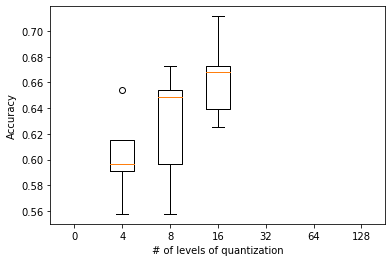

In [56]:
fig, axis = plt.subplots(1, 1)
axis.boxplot([non_uniform[nb_levels]['small'] for nb_levels in non_uniform])
axis.set_xticklabels([int(nb_levels) for nb_levels in non_uniform])
axis.set_xlabel("# of levels of quantization")
axis.set_ylabel("Accuracy")
plt.show()

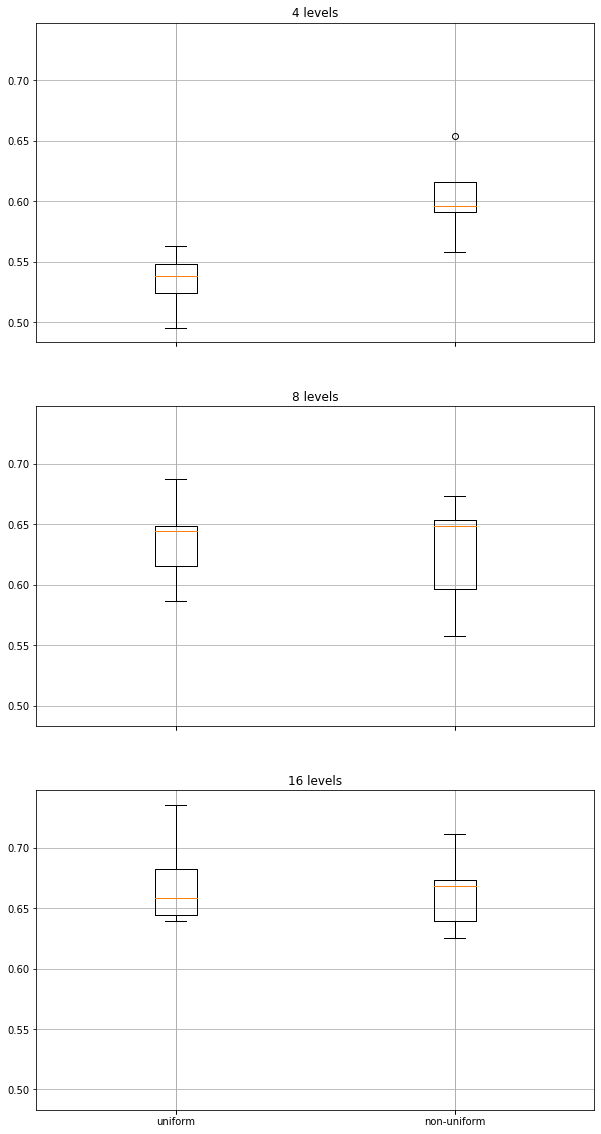

In [59]:
fig, axis = plt.subplots(3, 1, figsize=(10, 20), sharey=True, sharex=True)
axis = axis.flatten()
axis[0].boxplot([uniform['4']['small'], non_uniform['4']['small']])
axis[0].grid()
axis[0].set_title("4 levels")
axis[0].set_xticklabels(['uniform', 'non-uniform'])
axis[1].boxplot([uniform['8']['small'], non_uniform['8']['small']])
axis[1].grid()
axis[1].set_title("8 levels")
axis[1].set_xticklabels(['uniform', 'non-uniform'])
axis[2].boxplot([uniform['16']['small'], non_uniform['16']['small']])
axis[2].grid()
axis[2].set_title("16 levels")
axis[2].set_xticklabels(['uniform', 'non-uniform'])
plt.show()

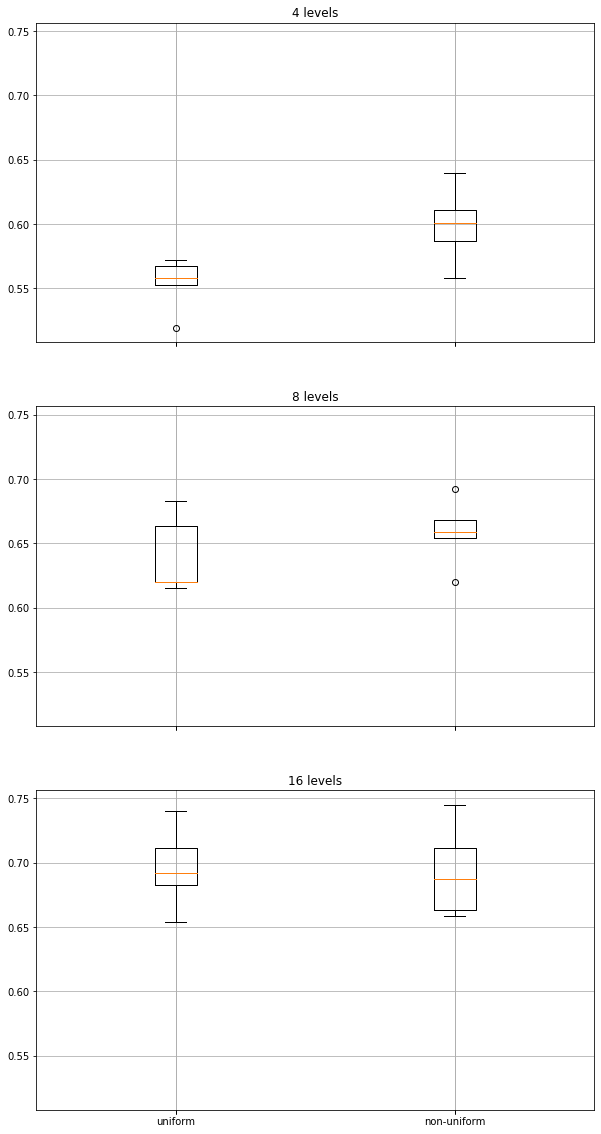

In [60]:
fig, axis = plt.subplots(3, 1, figsize=(10, 20), sharey=True, sharex=True)
axis = axis.flatten()
axis[0].boxplot([uniform['4']['large'], non_uniform['4']['large']])
axis[0].grid()
axis[0].set_title("4 levels")
axis[0].set_xticklabels(['uniform', 'non-uniform'])
axis[1].boxplot([uniform['8']['large'], non_uniform['8']['large']])
axis[1].grid()
axis[1].set_title("8 levels")
axis[1].set_xticklabels(['uniform', 'non-uniform'])
axis[2].boxplot([uniform['16']['large'], non_uniform['16']['large']])
axis[2].grid()
axis[2].set_title("16 levels")
axis[2].set_xticklabels(['uniform', 'non-uniform'])
plt.show()

### Results
* Comparing uniform VS non-uniform, only at 4 levels you see an advantage. After that, it seems the number of levels is high enough that there is no need fir smarter quantization!
    * When there are limited resources, non-uniform is better
* 64 levels of uniform, with large model, seems to give the best performance, although with a slight difference from no-quantization mode

---

## Next questions

* What is a good size for the model?
* Time to do the regression part!
    * Make the output size to be 4 (or the number of stars I want).
    * If there is one star, for the other 4 places, set it to -1
    * At final, make the classifier generate a mask, to take the regressor readings from.